## Table of Contents
<ul>
    <li><a href = "#intro">Introduction</a></li>
    <li><a href = "#gather">Data Gathering</a></li>
    <li><a href = "#assess">Data Assess</a></li>
    <li><a href = "#clean">Data Cleaning</a></li>
    <li><a href = "#save">Data Saving</a></li>
    <li><a href = "#visual">Data Visualization</a></li>
    <li><a href = "#conclude">Conclusion</a></li>
</ul>

<a id = 'intro'></a>
## INTRODUCTION

This project aims to gather data from three different sources, which are
• A csv file, that will be downloaded from Udacity site  
• A tsv file that is to be downloaded programmatically using request.     
• A Twitter user data (we rate dogs) which was gotten by interacting with twitter’s API using tweepy package on python.  
assess the datasets, clean them and create analysis about the tweets and the predicted dog’s breed.

The following are questions i want to answer by analysing and visualizing this dataset:  
- What is the most common dog stage
- What is the most common rating over ten given by users
- What are the top ten common names of dog
- Which dog has the most favourite dog count
- What is the most common source of data  
- Top ten dog breeds in P1,P2,P3

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
from bs4 import BeautifulSoup
import requests
import os
import json

<a id = 'gather'></a>
## DATA GATHERING

In [2]:
#Read the downloaded data into a dataframe
archive = pd.read_csv('twitter-archive-enhanced.csv')
archive.head()

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
0,892420643555336193,NaN,NaN,2017-08-01 16:23:56 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Phineas. He's a mystical boy. Only eve...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892420643...,13,10,Phineas,None,None,None,None
1,892177421306343426,NaN,NaN,2017-08-01 00:17:27 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Tilly. She's just checking pup on you....,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892177421...,13,10,Tilly,None,None,None,None
2,891815181378084864,NaN,NaN,2017-07-31 00:18:03 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Archie. He is a rare Norwegian Pouncin...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891815181...,12,10,Archie,None,None,None,None
3,891689557279858688,NaN,NaN,2017-07-30 15:58:51 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Darla. She commenced a snooze mid meal...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891689557...,13,10,Darla,None,None,None,None
4,891327558926688256,NaN,NaN,2017-07-29 16:00:24 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Franklin. He would like you to stop ca...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891327558...,12,10,Franklin,None,None,None,None


Downloading data from the internet

In [3]:
# download and read the data into a dataframe programically 
folder_name = 'image_predictions'
if not os.path.exists(folder_name):
    os.makedirs(folder_name)

link = 'https://d17h27t6h515a5.cloudfront.net/topher/2017/August/599fd2ad_image-predictions/image-predictions.tsv'    
r = requests.get(link)

In [4]:
with open (os.path.join(folder_name,
                       link.split('/')[-1]),mode = 'wb') as file:
    file.write(r.content)
    

In [5]:
img = pd.read_csv(r'C:\Users\ARAKAH\Downloads\Nanodegree\image-predictions.tsv', sep='\t')
img.head()

,tweet_id,jpg_url,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog
0,666020888022790149,https://pbs.twimg.com/media/CT4udn0WwAA0aMy.jpg,1,Welsh_springer_spaniel,0.465074,True,collie,0.156665,True,Shetland_sheepdog,0.061428,True
1,666029285002620928,https://pbs.twimg.com/media/CT42GRgUYAA5iDo.jpg,1,redbone,0.506826,True,miniature_pinscher,0.074192,True,Rhodesian_ridgeback,0.072010,True
2,666033412701032449,https://pbs.twimg.com/media/CT4521TWwAEvMyu.jpg,1,German_shepherd,0.596461,True,malinois,0.138584,True,bloodhound,0.116197,True
3,666044226329800704,https://pbs.twimg.com/media/CT5Dr8HUEAA-lEu.jpg,1,Rhodesian_ridgeback,0.408143,True,redbone,0.360687,True,miniature_pinscher,0.222752,True
4,666049248165822465,https://pbs.twimg.com/media/CT5IQmsXIAAKY4A.jpg,1,miniature_pinscher,0.560311,True,Rottweiler,0.243682,True,Doberman,0.154629,True


Scraping data from twitter

In [6]:
import tweepy
from tweepy import OAuthHandler
from timeit import default_timer as timer


consumer_key = ' '
consumer_secret = ' '
access_token = ' '
access_secret = ' '

auth = OAuthHandler(consumer_key, consumer_secret)
auth.set_access_token(access_token, access_secret)

api = tweepy.API(auth, wait_on_rate_limit=True)


tweet_ids = archive.tweet_id.values
len(tweet_ids)

# Query Twitter's API for JSON data for each tweet ID in the Twitter archive dataset
count = 0
fails_dict = {}
start = timer()
# Save each tweet's returned JSON as a new line in a .txt file
with open('tweet_json.txt', 'w') as file:
    # This loop will likely take 20-30 minutes to run because of Twitter's rate limit
    for tweet_id in tweet_ids:
        count += 1
        print(str(count) + ": " + str(tweet_id))
        try:
            tweet = api.get_status(tweet_id, tweet_mode='extended')
            print("Success")
            json.dump(tweet._json, file)
            file.write('\n')
        except tweepy.TweepError as e:
            print("Fail")
            fails_dict[tweet_id] = e
            pass
end = timer()
print(end - start)
print(fails_dict)

1: 892420643555336193


AttributeError: module 'tweepy' has no attribute 'TweepError'

In [30]:
# Reading a text file line by line
# using the text to form a list of dictionaries

with open('tweet_json') as file:
    tweet = []
    for line in file:
        tweet.append(json.loads(line))

In [31]:
# Create a dataframe from tweet_list of dictionaries
# saving it as a dataframe with the name tweets_df

twitter = pd.DataFrame(tweet, columns = ['id', 'retweet_count', 'favorite_count'])
twitter.head()

,id,retweet_count,favorite_count
0,892420643555336193,8853,39467
1,892177421306343426,6514,33819
2,891815181378084864,4328,25461
3,891689557279858688,8964,42908
4,891327558926688256,9774,41048


<a id = 'assess'></a>
## DATA ACCESSING

In [32]:
#to get apreview of what the data looks like
archive.head()

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
0,892420643555336193,NaN,NaN,2017-08-01 16:23:56 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Phineas. He's a mystical boy. Only eve...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892420643...,13,10,Phineas,None,None,None,None
1,892177421306343426,NaN,NaN,2017-08-01 00:17:27 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Tilly. She's just checking pup on you....,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892177421...,13,10,Tilly,None,None,None,None
2,891815181378084864,NaN,NaN,2017-07-31 00:18:03 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Archie. He is a rare Norwegian Pouncin...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891815181...,12,10,Archie,None,None,None,None
3,891689557279858688,NaN,NaN,2017-07-30 15:58:51 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Darla. She commenced a snooze mid meal...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891689557...,13,10,Darla,None,None,None,None
4,891327558926688256,NaN,NaN,2017-07-29 16:00:24 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Franklin. He would like you to stop ca...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891327558...,12,10,Franklin,None,None,None,None


In [33]:
archive.shape

(2356, 17)

There are 2356 rows and 17 columns in this dataset

In [34]:
archive.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2356 entries, 0 to 2355
Data columns (total 17 columns):
tweet_id                      2356 non-null int64
in_reply_to_status_id         78 non-null float64
in_reply_to_user_id           78 non-null float64
timestamp                     2356 non-null object
source                        2356 non-null object
text                          2356 non-null object
retweeted_status_id           181 non-null float64
retweeted_status_user_id      181 non-null float64
retweeted_status_timestamp    181 non-null object
expanded_urls                 2297 non-null object
rating_numerator              2356 non-null int64
rating_denominator            2356 non-null int64
name                          2356 non-null object
doggo                         2356 non-null object
floofer                       2356 non-null object
pupper                        2356 non-null object
puppo                         2356 non-null object
dtypes: float64(4), int64(3), ob

The tweet id datatype is int and should be a string  
- in_reply_to_status_id, in_reply_to_user_id, retweeted_status_id, retweeted_status_user_id, retweeted_status_timestamp and expanded_urls have missing datas  
- Timestamp dataype is string and it should be datetime  
- doggo, puppo, floofer and pupper are in separate columns when they should be in one

In [133]:
#to better understand the types of rating numerator values
archive.rating_numerator.value_counts()

12      558
11      464
10      461
13      351
9       158
8       102
7        55
14       54
5        37
6        32
3        19
4        17
1         9
2         9
420       2
0         2
15        2
75        2
80        1
20        1
24        1
26        1
44        1
50        1
60        1
165       1
84        1
88        1
144       1
182       1
143       1
666       1
960       1
1776      1
17        1
27        1
45        1
99        1
121       1
204       1
Name: rating_numerator, dtype: int64

There are so many outliers in the values, for example 1776,960 varies so much from the most common rating which is 12

In [36]:
#to better understand the unique values in rating denominator
archive.rating_denominator.value_counts()

10     2333
11        3
50        3
80        2
20        2
2         1
16        1
40        1
70        1
15        1
90        1
110       1
120       1
130       1
150       1
170       1
7         1
0         1
Name: rating_denominator, dtype: int64

In [37]:
#to better understand the unique values in name column
archive.name.value_counts()

None          745
a              55
Charlie        12
Oliver         11
Lucy           11
Cooper         11
Tucker         10
Lola           10
Penny          10
Bo              9
Winston         9
the             8
Sadie           8
Buddy           7
an              7
Daisy           7
Toby            7
Bailey          7
Koda            6
Scout           6
Jack            6
Stanley         6
Leo             6
Rusty           6
Jax             6
Oscar           6
Dave            6
Bella           6
Milo            6
Alfie           5
             ... 
Banjo           1
Thor            1
Georgie         1
Pawnd           1
Strider         1
Dotsy           1
Baron           1
Cilantro        1
Callie          1
Chevy           1
Ralphson        1
space           1
Brady           1
Swagger         1
Stewie          1
Emanuel         1
Sora            1
Rilo            1
Karma           1
Tove            1
Malikai         1
Rascal          1
Andy            1
Gordon          1
Theo      

There are values like None, a an that are not real dogs names

In [38]:
archive.head(1)

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
0,892420643555336193,NaN,NaN,2017-08-01 16:23:56 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Phineas. He's a mystical boy. Only eve...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892420643...,13,10,Phineas,None,None,None,None


In [39]:
#to check if there are empty values in each of the columns
archive[['doggo','floofer','pupper','puppo']].isnull().sum()

doggo      0
floofer    0
pupper     0
puppo      0
dtype: int64

It seems the empty columns have been represented as NAN

In [40]:
x  = archive[['doggo','floofer','pupper','puppo']] == 'None'
x.sum()

doggo      2259
floofer    2346
pupper     2099
puppo      2326
dtype: int64

It can be seen that there are so many values in the above columns that their values are Nan

In [41]:
##to better understand the unique values in source column
archive.source.value_counts()

<a href="http://twitter.com/download/iphone" rel="nofollow">Twitter for iPhone</a>     2221
<a href="http://vine.co" rel="nofollow">Vine - Make a Scene</a>                          91
<a href="http://twitter.com" rel="nofollow">Twitter Web Client</a>                       33
<a href="https://about.twitter.com/products/tweetdeck" rel="nofollow">TweetDeck</a>      11
Name: source, dtype: int64

The source column contains both text and hyperlink

In [42]:
archive.source.isnull().sum()

0

In [43]:
archive.expanded_urls.duplicated().sum()

137

There are 137 duplicated values in the expanded url column

In [44]:
archive.expanded_urls.isnull().sum()

59

There are 59 Null values in the column

In [45]:
archive.text.value_counts();


#### Quality issues detected:
- incorrect data type for:  
    - archive data's tweet id,timestamp, rating numerator and denominator;  
- in_reply_to_status_id, in_reply_to_user_id, retweeted_status_id, retweeted_status_user_id, retweeted_status_timestamp columns have missing values and are not needed for our analysis  
- rating numerator has some outliers that is likely due to human error while tweeting  
- Some rating_denominators have zeros  and some values less than 10
- Dog named NONE,a,an depicts missing names  
- Dog stages represented as 'None'and some dogs have more than one dog stage
- expanded_urls column have missing values  
- Source column is formatted in HTML and is in 'a' tag   
- text column includes both text and a link.

#### Tidiness issues detected:
The dog stages in different columns in the df dataframe should be merged into one column named "dog_stage"

In [46]:
img.describe()

,tweet_id,img_num,p1_conf,p2_conf,p3_conf
count,2.075000e+03,2075.000000,2075.000000,2.075000e+03,2.075000e+03
mean,7.384514e+17,1.203855,0.594548,1.345886e-01,6.032417e-02
std,6.785203e+16,0.561875,0.271174,1.006657e-01,5.090593e-02
min,6.660209e+17,1.000000,0.044333,1.011300e-08,1.740170e-10
25%,6.764835e+17,1.000000,0.364412,5.388625e-02,1.622240e-02
50%,7.119988e+17,1.000000,0.588230,1.181810e-01,4.944380e-02
75%,7.932034e+17,1.000000,0.843855,1.955655e-01,9.180755e-02
max,8.924206e+17,4.000000,1.000000,4.880140e-01,2.734190e-01


In [47]:
img.shape

(2075, 12)

There are 2075 rows and 12 columns in this dataset

In [48]:
img.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2075 entries, 0 to 2074
Data columns (total 12 columns):
tweet_id    2075 non-null int64
jpg_url     2075 non-null object
img_num     2075 non-null int64
p1          2075 non-null object
p1_conf     2075 non-null float64
p1_dog      2075 non-null bool
p2          2075 non-null object
p2_conf     2075 non-null float64
p2_dog      2075 non-null bool
p3          2075 non-null object
p3_conf     2075 non-null float64
p3_dog      2075 non-null bool
dtypes: bool(3), float64(3), int64(2), object(4)
memory usage: 152.1+ KB


There are zero null values in the dataset

In [49]:
img.head(1)

,tweet_id,jpg_url,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog
0,666020888022790149,https://pbs.twimg.com/media/CT4udn0WwAA0aMy.jpg,1,Welsh_springer_spaniel,0.465074,True,collie,0.156665,True,Shetland_sheepdog,0.061428,True


In [50]:
img.jpg_url.duplicated().sum()

66

66 duplicated values in the jpg_url column of the dataset

#### Quality issues detected:
- tweet id incorrect data type  
- In p1,p2 and P3 columns, there are inconsistency with dog names  
- Duplicated values in jpg url column

In [51]:
twitter.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2354 entries, 0 to 2353
Data columns (total 3 columns):
id                2354 non-null int64
retweet_count     2354 non-null int64
favorite_count    2354 non-null int64
dtypes: int64(3)
memory usage: 55.2 KB


Zero null values in the dataset

In [52]:
twitter.describe()

,id,retweet_count,favorite_count
count,2.354000e+03,2354.000000,2354.000000
mean,7.426978e+17,3164.797366,8080.968564
std,6.852812e+16,5284.770364,11814.771334
min,6.660209e+17,0.000000,0.000000
25%,6.783975e+17,624.500000,1415.000000
50%,7.194596e+17,1473.500000,3603.500000
75%,7.993058e+17,3652.000000,10122.250000
max,8.924206e+17,79515.000000,132810.000000


__Quality issues:__
    incorrect name and datatype for id  
__Tidyness issue:__
    Retweet count column not needed

### Total quality issues detected:
1) Incorrect data type and or name for:  
    - archive data's tweet id,timestamp, rating numerator and denominator;  
    - img data's tweet id 
    - twitter data's id
2) in_reply_to_status_id, in_reply_to_user_id, retweeted_status_id, retweeted_status_user_id, retweeted_status_timestamp columns in archive dataframe and Retweet count column in twitter dataframe have missing values and are not needed for our analysis  
3) rating numerator and denominators has some outliers that is likely due to human error while tweeting  
4) Some rating denominators have values that aren't 10 as their values
5) Dog named NONE,a,an depicts missing names  
6) Dog stages represented as 'None' and some doga have more than 1 dog stage  
7) expanded_urls column have missing values   
8) Source column is formatted in HTML and is in 'a' tag     
9) In p1,p2 and P3 columns, there are inconsistency with dog names   
10) Duplicated values in jpg url column   


### Total  tidiness issues detected:  
1) The dog stages in different columns in the df dataframe should be merged into one column named "dog_stage"    
2) The datasets needs to be merged for easy analysis  

<a id = 'clean'></a>
## Data Cleaning

In [283]:
#Make a copy of the dirty dataset to work on
archive_clean= archive.copy()
img_clean = img.copy()
twitter_clean = twitter.copy()

#### Quality issue 1:

- Incorrect data type and or name for:  
    - archive data's tweet id,timestamp, rating numerator and denominator;  
    - img data's tweet id 
    - twitter data's id
    
    
__Define__  
 i'd convert archive data's tweet id data type from int to string

__Code__

In [284]:
archive_clean.tweet_id = archive_clean.tweet_id.astype(str)

__Test__

In [285]:
print(archive_clean['tweet_id'].dtype)

object


In [286]:
archive_clean.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2356 entries, 0 to 2355
Data columns (total 17 columns):
tweet_id                      2356 non-null object
in_reply_to_status_id         78 non-null float64
in_reply_to_user_id           78 non-null float64
timestamp                     2356 non-null object
source                        2356 non-null object
text                          2356 non-null object
retweeted_status_id           181 non-null float64
retweeted_status_user_id      181 non-null float64
retweeted_status_timestamp    181 non-null object
expanded_urls                 2297 non-null object
rating_numerator              2356 non-null int64
rating_denominator            2356 non-null int64
name                          2356 non-null object
doggo                         2356 non-null object
floofer                       2356 non-null object
pupper                        2356 non-null object
puppo                         2356 non-null object
dtypes: float64(4), int64(2), o

__Define__


I'd convert archive dataframe's timetstamp column's datatype from string to timestamp

__Code__

In [287]:
archive_clean.timestamp = pd.to_datetime(archive_clean.timestamp)

__Test__

In [288]:
print(archive_clean.timestamp.dtype)

datetime64[ns, UTC]


__Define__

I'll change the datatype of both the rating numerator and denominator of the archive's dataframe from int to float

__Code__

In [289]:
#convert both rating numerator and denominator to float
archive_clean.rating_numerator=archive_clean.rating_numerator.astype(float)
archive_clean.rating_denominator=archive_clean.rating_denominator.astype(float)

__Test__

In [290]:
print(archive_clean.rating_numerator.dtype)
print(archive_clean.rating_denominator.dtype)

float64
float64



__Define__

 Change the data type for img dataframe's tweet id from int to object

__Code__

In [291]:
img_clean.tweet_id = img_clean.tweet_id.astype(str)

__Test__

In [292]:
print(img_clean.tweet_id.dtype)

object


__Define__  
I'll rename twitter dataframe's id to tweet id, so as to conform with the other two datasets;  
I'll then convert its data type from int to string

__Code__

In [293]:
twitter_clean = twitter_clean.rename(columns= {'id':'tweet_id'})


In [294]:
twitter_clean.tweet_id = twitter_clean.tweet_id.astype(str)

__Test__

In [295]:
twitter_clean.head()

,tweet_id,retweet_count,favorite_count
0,892420643555336193,8853,39467
1,892177421306343426,6514,33819
2,891815181378084864,4328,25461
3,891689557279858688,8964,42908
4,891327558926688256,9774,41048


In [296]:
print(twitter_clean.tweet_id.dtype)

object


#### Quality issue 2:

in_reply_to_status_id, in_reply_to_user_id, retweeted_status_id, retweeted_status_user_id, retweeted_status_timestamp columns have missing values and twitter data's Retweet count column are not needed for our analysis   
__Define__


i'd Delete the following columns: in_reply_to_status_id, in_reply_to_user_id, retweeted_status_id, retweeted_status_user_id, retweeted_status_timestamp as they have missing values and are not needed for our analysis

__Code__

In [297]:
archive_clean.head()

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
0,892420643555336193,NaN,NaN,2017-08-01 16:23:56+00:00,"<a href=""http://twitter.com/download/iphone"" r...",This is Phineas. He's a mystical boy. Only eve...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892420643...,13.0,10.0,Phineas,None,None,None,None
1,892177421306343426,NaN,NaN,2017-08-01 00:17:27+00:00,"<a href=""http://twitter.com/download/iphone"" r...",This is Tilly. She's just checking pup on you....,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892177421...,13.0,10.0,Tilly,None,None,None,None
2,891815181378084864,NaN,NaN,2017-07-31 00:18:03+00:00,"<a href=""http://twitter.com/download/iphone"" r...",This is Archie. He is a rare Norwegian Pouncin...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891815181...,12.0,10.0,Archie,None,None,None,None
3,891689557279858688,NaN,NaN,2017-07-30 15:58:51+00:00,"<a href=""http://twitter.com/download/iphone"" r...",This is Darla. She commenced a snooze mid meal...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891689557...,13.0,10.0,Darla,None,None,None,None
4,891327558926688256,NaN,NaN,2017-07-29 16:00:24+00:00,"<a href=""http://twitter.com/download/iphone"" r...",This is Franklin. He would like you to stop ca...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891327558...,12.0,10.0,Franklin,None,None,None,None


In [298]:
archive_clean.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2356 entries, 0 to 2355
Data columns (total 17 columns):
tweet_id                      2356 non-null object
in_reply_to_status_id         78 non-null float64
in_reply_to_user_id           78 non-null float64
timestamp                     2356 non-null datetime64[ns, UTC]
source                        2356 non-null object
text                          2356 non-null object
retweeted_status_id           181 non-null float64
retweeted_status_user_id      181 non-null float64
retweeted_status_timestamp    181 non-null object
expanded_urls                 2297 non-null object
rating_numerator              2356 non-null float64
rating_denominator            2356 non-null float64
name                          2356 non-null object
doggo                         2356 non-null object
floofer                       2356 non-null object
pupper                        2356 non-null object
puppo                         2356 non-null object
dtypes: dateti

In [299]:
archive_clean = archive_clean[archive_clean['in_reply_to_status_id'].isnull()]
archive_clean = archive_clean[archive_clean['retweeted_status_id'].isnull()]
archive_clean.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2097 entries, 0 to 2355
Data columns (total 17 columns):
tweet_id                      2097 non-null object
in_reply_to_status_id         0 non-null float64
in_reply_to_user_id           0 non-null float64
timestamp                     2097 non-null datetime64[ns, UTC]
source                        2097 non-null object
text                          2097 non-null object
retweeted_status_id           0 non-null float64
retweeted_status_user_id      0 non-null float64
retweeted_status_timestamp    0 non-null object
expanded_urls                 2094 non-null object
rating_numerator              2097 non-null float64
rating_denominator            2097 non-null float64
name                          2097 non-null object
doggo                         2097 non-null object
floofer                       2097 non-null object
pupper                        2097 non-null object
puppo                         2097 non-null object
dtypes: datetime64[ns,

In [300]:
archive_clean = archive_clean.drop(
                                    labels = ['in_reply_to_status_id',
                                             'in_reply_to_user_id',
                                             'retweeted_status_id',
                                             'retweeted_status_user_id',
                                             'retweeted_status_timestamp'],
                                                axis = 1, inplace = False)

__Test__

In [301]:
archive_clean.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2097 entries, 0 to 2355
Data columns (total 12 columns):
tweet_id              2097 non-null object
timestamp             2097 non-null datetime64[ns, UTC]
source                2097 non-null object
text                  2097 non-null object
expanded_urls         2094 non-null object
rating_numerator      2097 non-null float64
rating_denominator    2097 non-null float64
name                  2097 non-null object
doggo                 2097 non-null object
floofer               2097 non-null object
pupper                2097 non-null object
puppo                 2097 non-null object
dtypes: datetime64[ns, UTC](1), float64(2), object(9)
memory usage: 213.0+ KB



__Define__

I'd delete the retweet count column in the twitter's dataframe because its not needed in our analysis

__Code__

In [302]:
twitter_clean.drop(columns = ('retweet_count'), inplace = True, axis =1)

__Test__

In [303]:
twitter_clean.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2354 entries, 0 to 2353
Data columns (total 2 columns):
tweet_id          2354 non-null object
favorite_count    2354 non-null int64
dtypes: int64(1), object(1)
memory usage: 36.9+ KB


#### Quality issue 3, 4
__Define__


3) Delete rating numerator outliers that is likely due to human error while tweeting   
4) Delete rating_denominators that have zeros and values less than 10

I'd delete the rating numerator outliers   
I'd then delete the rating denominators that have values of zero

__Code__

In [304]:
archive_clean.rating_numerator.value_counts().index

Float64Index([  12.0,   10.0,   11.0,   13.0,    9.0,    8.0,    7.0,   14.0,
                 5.0,    6.0,    3.0,    4.0,    2.0,    1.0,   24.0,   27.0,
                84.0,    0.0,  420.0,   75.0,   80.0,   60.0,   44.0,   26.0,
               144.0,   88.0,  121.0,   99.0,  204.0, 1776.0,   45.0,  165.0,
                50.0],
             dtype='float64')

In [305]:
archive_clean = archive_clean.loc[archive_clean['rating_numerator'] <= 100.0]

__Test__

In [306]:
archive_clean.rating_numerator.value_counts()

12.0    486
10.0    436
11.0    413
13.0    287
9.0     153
8.0      98
7.0      52
14.0     38
5.0      34
6.0      32
3.0      19
4.0      16
2.0       9
1.0       5
26.0      1
0.0       1
45.0      1
88.0      1
27.0      1
84.0      1
24.0      1
44.0      1
99.0      1
50.0      1
80.0      1
60.0      1
75.0      1
Name: rating_numerator, dtype: int64

In [307]:
archive_clean.rating_denominator.value_counts()

10.0    2078
50.0       3
80.0       2
11.0       2
90.0       1
70.0       1
2.0        1
40.0       1
20.0       1
7.0        1
Name: rating_denominator, dtype: int64

In [308]:
#archive_clean[archive_clean['rating_denominator'] != 10.0]

In [309]:
#x = (archive_clean[archive_clean['rating_denominator'] != 10.0])['text']
#x.value_counts()

In [310]:
#pd.set_option('display.max_rows', None)
#x =(archive_clean[archive_clean['rating_denominator'] == 50.0])['text']
#x.value_counts()


__Define__

Some denominators have values that aren't 10, i'd be dropping those data

__Code__

In [311]:
archive_clean = archive_clean.loc[archive_clean['rating_denominator'] == 10]

__Test__

In [312]:
archive_clean.rating_denominator.value_counts()

10.0    2078
Name: rating_denominator, dtype: int64

#### Quality issue 5
__Define__

I'd rename non standard names like a, an to None so they can be easily analysed

__Code__

In [313]:
# Initialization of variable.
wrong_name = []

# Loop to find ordinary word.
for index in archive_clean.name:
    # check every name for lowercase first letter.
    if index.islower():
        # If yes will append to non_names.
        wrong_name.append(index)

# The list will filter only unique values
wrong_name = list(set(wrong_name))

# Loop to replace each non standard name (non_name).
for index in wrong_name:
    archive_clean.name.replace(index,
                              "None",
                              inplace = True)

__Test__

In [314]:
archive_clean.name.value_counts();

#### Quality issue 6
__Define__


10) Dog stages represented as 'None'   
11) Some dogs have more than one dog stage  

#### Tidiness issue 1
1) The dog stages in different columns in the df dataframe should be merged into one column named "dog_stage"  

I'd be extracting the dog stages values from the text column and populating a new column called dog stage with the values  
and then discarding the doggo, pupper, puppo and floofer columns  


__Code__

In [315]:
archive_clean.groupby(["doggo","floofer","pupper","puppo"]).size().reset_index().rename(columns= {0 : "count"})

,doggo,floofer,pupper,puppo,count
0,None,None,None,None,1742
1,None,None,None,puppo,23
2,None,None,pupper,None,221
3,None,floofer,None,None,9
4,doggo,None,None,None,72
5,doggo,None,None,puppo,1
6,doggo,None,pupper,None,9
7,doggo,floofer,None,None,1


In [316]:
archive_clean['dog_stage'] = archive_clean['text'].str.extract('(doggo|pupper|floofer|puppo)')
archive_clean.head()

,tweet_id,timestamp,source,text,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo,dog_stage
0,892420643555336193,2017-08-01 16:23:56+00:00,"<a href=""http://twitter.com/download/iphone"" r...",This is Phineas. He's a mystical boy. Only eve...,https://twitter.com/dog_rates/status/892420643...,13.0,10.0,Phineas,None,None,None,None,NaN
1,892177421306343426,2017-08-01 00:17:27+00:00,"<a href=""http://twitter.com/download/iphone"" r...",This is Tilly. She's just checking pup on you....,https://twitter.com/dog_rates/status/892177421...,13.0,10.0,Tilly,None,None,None,None,NaN
2,891815181378084864,2017-07-31 00:18:03+00:00,"<a href=""http://twitter.com/download/iphone"" r...",This is Archie. He is a rare Norwegian Pouncin...,https://twitter.com/dog_rates/status/891815181...,12.0,10.0,Archie,None,None,None,None,NaN
3,891689557279858688,2017-07-30 15:58:51+00:00,"<a href=""http://twitter.com/download/iphone"" r...",This is Darla. She commenced a snooze mid meal...,https://twitter.com/dog_rates/status/891689557...,13.0,10.0,Darla,None,None,None,None,NaN
4,891327558926688256,2017-07-29 16:00:24+00:00,"<a href=""http://twitter.com/download/iphone"" r...",This is Franklin. He would like you to stop ca...,https://twitter.com/dog_rates/status/891327558...,12.0,10.0,Franklin,None,None,None,None,NaN


In [317]:
archive_clean.drop(columns = ['doggo','pupper','floofer','puppo'], inplace = True)

__Test__

In [318]:
archive_clean.dog_stage.value_counts()

pupper     235
doggo       79
puppo       29
floofer      4
Name: dog_stage, dtype: int64

#### Quality issue 7
__Define__

The expanded url colun have missing values  
I'd drop this column because its not useful in our analysis

__Code__

In [319]:
archive_clean.drop(columns = ('expanded_urls'), inplace = True,  axis= 1)

__Test__

In [320]:
archive_clean.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2078 entries, 0 to 2355
Data columns (total 8 columns):
tweet_id              2078 non-null object
timestamp             2078 non-null datetime64[ns, UTC]
source                2078 non-null object
text                  2078 non-null object
rating_numerator      2078 non-null float64
rating_denominator    2078 non-null float64
name                  2078 non-null object
dog_stage             347 non-null object
dtypes: datetime64[ns, UTC](1), float64(2), object(5)
memory usage: 146.1+ KB


#### Quality issue 8
__Define__

13) Source column is formatted in HTML and is in 'a' tag  
For the issue listed above, i'll 

In [321]:
archive_clean.source.tolist();

__Code__

In [322]:
source_new = []
source_new_url = [] 
archive_clean = archive_clean[archive_clean['source'].notnull()]
# This loop will remove all HTML tags using .split() and indexing.
for values in archive_clean.source:
    source_new.append(values.split('" rel="nofollow">')[1].split('<')[0])
    source_new_url.append(values.split('"')[1].split(' ')[0] )

archive_clean = pd.concat([archive_clean, pd.DataFrame(source_new_url, columns= ['source_url'])], axis = 1)
archive_clean = pd.concat([archive_clean, pd.DataFrame(source_new, columns = ['source_new'])], axis = 1)

__Test__

In [323]:
archive_clean[['tweet_id','source_new','source_url']].head()

,tweet_id,source_new,source_url
0,892420643555336193,Twitter for iPhone,http://twitter.com/download/iphone
1,892177421306343426,Twitter for iPhone,http://twitter.com/download/iphone
2,891815181378084864,Twitter for iPhone,http://twitter.com/download/iphone
3,891689557279858688,Twitter for iPhone,http://twitter.com/download/iphone
4,891327558926688256,Twitter for iPhone,http://twitter.com/download/iphone


#### Quality issue 9
__Define__

15) In p1,p2 and P3 columns, there are inconsistency with dog names  
Converting all names to lower cases  
Replace dashes with underscore

__Code__

In [324]:
img_clean.tail()

,tweet_id,jpg_url,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog
2070,891327558926688256,https://pbs.twimg.com/media/DF6hr6BUMAAzZgT.jpg,2,basset,0.555712,True,English_springer,0.225770,True,German_short-haired_pointer,0.175219,True
2071,891689557279858688,https://pbs.twimg.com/media/DF_q7IAWsAEuuN8.jpg,1,paper_towel,0.170278,False,Labrador_retriever,0.168086,True,spatula,0.040836,False
2072,891815181378084864,https://pbs.twimg.com/media/DGBdLU1WsAANxJ9.jpg,1,Chihuahua,0.716012,True,malamute,0.078253,True,kelpie,0.031379,True
2073,892177421306343426,https://pbs.twimg.com/media/DGGmoV4XsAAUL6n.jpg,1,Chihuahua,0.323581,True,Pekinese,0.090647,True,papillon,0.068957,True
2074,892420643555336193,https://pbs.twimg.com/media/DGKD1-bXoAAIAUK.jpg,1,orange,0.097049,False,bagel,0.085851,False,banana,0.076110,False


In [325]:
'''A function to fix names of dog; by firstly converting all names to lower cases and then replacing all the dashes with underscore'''
def replace(list_names):
    fixed_names = list(map(lambda x : x.lower(), list_names ))
    result_names = list(map(lambda x : x.replace('-','_'), fixed_names ))
    return result_names 

img_clean.p1 = replace(img_clean.p1)
img_clean.p2 = replace(img_clean.p1)
img_clean.p3 = replace(img_clean.p1)

__Test__

In [326]:
img_clean.head()

,tweet_id,jpg_url,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog
0,666020888022790149,https://pbs.twimg.com/media/CT4udn0WwAA0aMy.jpg,1,welsh_springer_spaniel,0.465074,True,welsh_springer_spaniel,0.156665,True,welsh_springer_spaniel,0.061428,True
1,666029285002620928,https://pbs.twimg.com/media/CT42GRgUYAA5iDo.jpg,1,redbone,0.506826,True,redbone,0.074192,True,redbone,0.072010,True
2,666033412701032449,https://pbs.twimg.com/media/CT4521TWwAEvMyu.jpg,1,german_shepherd,0.596461,True,german_shepherd,0.138584,True,german_shepherd,0.116197,True
3,666044226329800704,https://pbs.twimg.com/media/CT5Dr8HUEAA-lEu.jpg,1,rhodesian_ridgeback,0.408143,True,rhodesian_ridgeback,0.360687,True,rhodesian_ridgeback,0.222752,True
4,666049248165822465,https://pbs.twimg.com/media/CT5IQmsXIAAKY4A.jpg,1,miniature_pinscher,0.560311,True,miniature_pinscher,0.243682,True,miniature_pinscher,0.154629,True


#### Quality issue 10
__Define__

17) Duplicated values in jpg url column   
Remove the duplicated values in the columns

__Code__

In [327]:
img_clean['jpg_url'].duplicated().sum()

66

In [328]:
img_clean.drop_duplicates();

__Test__

In [329]:
img_clean.duplicated().sum()

0

#### Tidiness issue 2
__Define__

__for better analyses i would combine both the "archive_clean" and "img_clean" datasets__

In [330]:
twitter_clean.head()

,tweet_id,favorite_count
0,892420643555336193,39467
1,892177421306343426,33819
2,891815181378084864,25461
3,891689557279858688,42908
4,891327558926688256,41048


__Code__

In [331]:
finaltweet=pd.merge(archive_clean,img_clean, on = "tweet_id",  how = 'left').merge(twitter_clean, on = 'tweet_id', how = 'left')

__Test__

In [332]:
finaltweet.head()

,tweet_id,timestamp,source,text,rating_numerator,rating_denominator,name,dog_stage,source_url,source_new,...,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog,favorite_count
0,892420643555336193,2017-08-01 16:23:56+00:00,"<a href=""http://twitter.com/download/iphone"" r...",This is Phineas. He's a mystical boy. Only eve...,13.0,10.0,Phineas,NaN,http://twitter.com/download/iphone,Twitter for iPhone,...,orange,0.097049,False,orange,0.085851,False,orange,0.076110,False,39467.0
1,892177421306343426,2017-08-01 00:17:27+00:00,"<a href=""http://twitter.com/download/iphone"" r...",This is Tilly. She's just checking pup on you....,13.0,10.0,Tilly,NaN,http://twitter.com/download/iphone,Twitter for iPhone,...,chihuahua,0.323581,True,chihuahua,0.090647,True,chihuahua,0.068957,True,33819.0
2,891815181378084864,2017-07-31 00:18:03+00:00,"<a href=""http://twitter.com/download/iphone"" r...",This is Archie. He is a rare Norwegian Pouncin...,12.0,10.0,Archie,NaN,http://twitter.com/download/iphone,Twitter for iPhone,...,chihuahua,0.716012,True,chihuahua,0.078253,True,chihuahua,0.031379,True,25461.0
3,891689557279858688,2017-07-30 15:58:51+00:00,"<a href=""http://twitter.com/download/iphone"" r...",This is Darla. She commenced a snooze mid meal...,13.0,10.0,Darla,NaN,http://twitter.com/download/iphone,Twitter for iPhone,...,paper_towel,0.170278,False,paper_towel,0.168086,True,paper_towel,0.040836,False,42908.0
4,891327558926688256,2017-07-29 16:00:24+00:00,"<a href=""http://twitter.com/download/iphone"" r...",This is Franklin. He would like you to stop ca...,12.0,10.0,Franklin,NaN,http://twitter.com/download/iphone,Twitter for iPhone,...,basset,0.555712,True,basset,0.225770,True,basset,0.175219,True,41048.0


In [333]:
finaltweet.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2349 entries, 0 to 2348
Data columns (total 22 columns):
tweet_id              2078 non-null object
timestamp             2078 non-null datetime64[ns, UTC]
source                2078 non-null object
text                  2078 non-null object
rating_numerator      2078 non-null float64
rating_denominator    2078 non-null float64
name                  2078 non-null object
dog_stage             347 non-null object
source_url            2078 non-null object
source_new            2078 non-null object
jpg_url               1952 non-null object
img_num               1952 non-null float64
p1                    1952 non-null object
p1_conf               1952 non-null float64
p1_dog                1952 non-null object
p2                    1952 non-null object
p2_conf               1952 non-null float64
p2_dog                1952 non-null object
p3                    1952 non-null object
p3_conf               1952 non-null float64
p3_dog         

In [181]:
finaltweet.dropna();

In [ ]:
finaltweet.tweet_id.isnull().sum()

<a id = 'save'></a>
## Data Saving

In [334]:
finaltweet.to_csv('We_rate_dogs.csv', index = False)

Read the file into a df

In [335]:
we_rate_dogs_df = pd.read_csv('We_rate_dogs.csv')

In [336]:
we_rate_dogs_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2349 entries, 0 to 2348
Data columns (total 22 columns):
tweet_id              2078 non-null float64
timestamp             2078 non-null object
source                2078 non-null object
text                  2078 non-null object
rating_numerator      2078 non-null float64
rating_denominator    2078 non-null float64
name                  2078 non-null object
dog_stage             347 non-null object
source_url            2078 non-null object
source_new            2078 non-null object
jpg_url               1952 non-null object
img_num               1952 non-null float64
p1                    1952 non-null object
p1_conf               1952 non-null float64
p1_dog                1952 non-null object
p2                    1952 non-null object
p2_conf               1952 non-null float64
p2_dog                1952 non-null object
p3                    1952 non-null object
p3_conf               1952 non-null float64
p3_dog                1952 

<a id = 'visual'></a>
## Data Visualisation

What is the most common dog stage
What is the most common rating over ten given by users
What are the top ten common names of dog
Which dog has the most favourite count  
What is the most common source

__What is the most common dog stage__

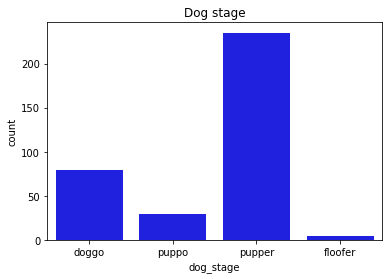

In [337]:
sns.countplot(data=we_rate_dogs_df, x='dog_stage', color = 'blue').set(title = 'Dog stage');

It can be seen from the chart above, that pupper is the most common dog stage, followed by doggo, then puppo and lastly floofer

__What is the most common rating over ten given by users__

In [338]:
x = we_rate_dogs_df.rating_numerator.value_counts().nlargest(10)
print(x)

12.0    486
10.0    436
11.0    413
13.0    287
9.0     152
8.0      98
7.0      51
14.0     38
5.0      34
6.0      32
Name: rating_numerator, dtype: int64


The highest rating given by users is __12__

__What are the top ten common names of dog__

In [339]:
we_rate_dogs_df.name.value_counts().nlargest(10)

None       692
Lucy        11
Charlie     11
Oliver      10
Cooper      10
Tucker       9
Penny        9
Sadie        8
Winston      8
Lola         8
Name: name, dtype: int64

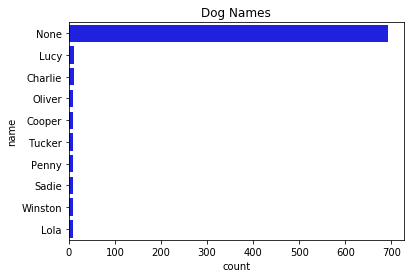

In [340]:
group_count = 10
order = we_rate_dogs_df.name.value_counts().iloc[:group_count].index
sns.countplot(data = we_rate_dogs_df, y='name', order = order, color = 'blue').set(title = 'Dog Names');

From above, it can be seen that most of the dogs in the dataset had badly inputed name or had no names at all,  
but apart from them, Lucy is the most common name, followed closely behind by Charlie, then Cooper and Oliver

__Which dog has the highest favourite count__

In [341]:
we_rate_dogs_df.favorite_count.max()

132810.0

In [342]:
Highest_fav = we_rate_dogs_df[we_rate_dogs_df['favorite_count'] == 132810.0 ]
Highest_fav

,tweet_id,timestamp,source,text,rating_numerator,rating_denominator,name,dog_stage,source_url,source_new,...,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog,favorite_count
413,8.228729e+17,2017-01-21 18:26:02+00:00,"<a href=""http://twitter.com/download/iphone"" r...",Here's a super supportive puppo participating ...,13.0,10.0,None,puppo,http://vine.co,Vine - Make a Scene,...,lakeland_terrier,0.196015,True,lakeland_terrier,0.160329,True,lakeland_terrier,0.069126,True,132810.0


The details of the dog with the highest favourite count is:
_ It has a rating of 13 over 10  
_ It wasn't named correctly
- Its dog stage is puppo  
- Its source is from iphone
- Its a lakeland_terrier dog

__What is the most common source of data__

In [343]:
we_rate_dogs_df.source_new.value_counts()

Twitter for iPhone     1946
Vine - Make a Scene      91
Twitter Web Client       31
TweetDeck                10
Name: source_new, dtype: int64

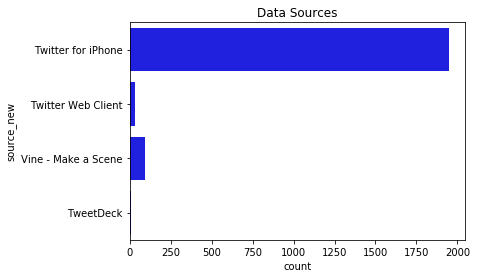

In [344]:
sns.countplot(data = we_rate_dogs_df, y = 'source_new', color = 'blue').set(title = 'Data Sources');

From the above plot; it can be seen that most of the data was gotten from Iphone users

__What are the top ten dog's breed in prediction 1__

In [345]:
we_rate_dogs_df.p1.value_counts().nlargest(10)

golden_retriever      134
labrador_retriever     91
pembroke               88
chihuahua              78
pug                    54
chow                   41
samoyed                40
pomeranian             38
toy_poodle             37
malamute               29
Name: p1, dtype: int64

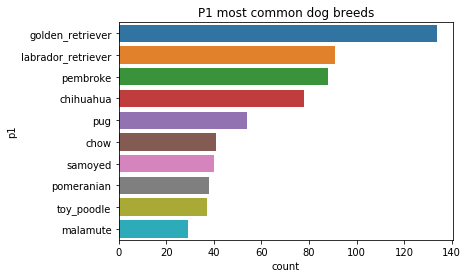

In [346]:
group_count = 10
order = we_rate_dogs_df.p1.value_counts().iloc[:group_count].index
sns.countplot(data= we_rate_dogs_df, y = 'p1', order = order).set(title = 'P1 most common dog breeds');

__Golden retreiver is the most common dog breed's in prediction1__

__What are the top ten dog's breed in prediction 2__

In [347]:
we_rate_dogs_df.p2.value_counts().nlargest(10)

golden_retriever      134
labrador_retriever     91
pembroke               88
chihuahua              78
pug                    54
chow                   41
samoyed                40
pomeranian             38
toy_poodle             37
malamute               29
Name: p2, dtype: int64

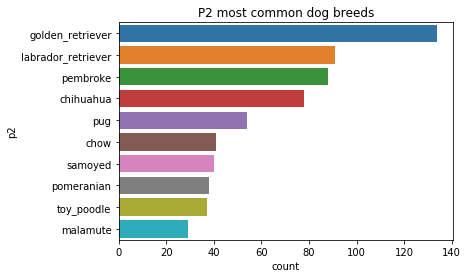

In [348]:
group_count = 10
order = we_rate_dogs_df.p2.value_counts().iloc[:group_count].index
sns.countplot(data= we_rate_dogs_df, y = 'p2', order = order).set(title = 'P2 most common dog breeds');

__What are the top ten dog's breed in prediction 3__

In [349]:
we_rate_dogs_df.p3.value_counts().nlargest(10)

golden_retriever      134
labrador_retriever     91
pembroke               88
chihuahua              78
pug                    54
chow                   41
samoyed                40
pomeranian             38
toy_poodle             37
malamute               29
Name: p3, dtype: int64

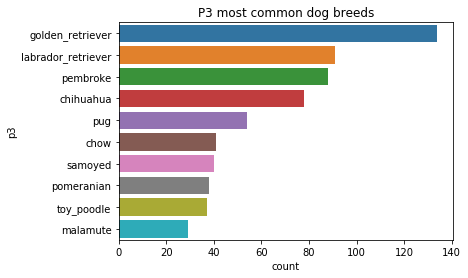

In [350]:
group_count = 10
order = we_rate_dogs_df.p3.value_counts().iloc[:group_count].index
sns.countplot(data= we_rate_dogs_df, y = 'p3', order = order).set(title = 'P3 most common dog breeds');

<a id = 'conclude'></a>
## Conclusion

After, gathering datasets from three different sources, assessing them and noting down both quality and tidiness issues, then cleaning the datasets by fixing those issues. The datasets were then joined to make our analysis more detailed.   
Then the cleaned and joined dataset was now visualized and i was able to answer some questions by analysing the dataset.   
It can be concluded that based on this dataset:
    - The most common dog name is pupper  
    - The most common rating given by users is 12  
    - The most common name given to a dog is Lucy
    - A lakeland_terrier dog has the most favorite count
    - The most common source  of the data is Twitter for Iphone
    - For P1,P2 and P3 golden retriever is the most common dog breed